In [0]:
# 밸리데이션은 하이퍼파라미터 튜닝할때
!wget /content/drive/My Drive/data/energy.csv

/content/drive/My: Scheme missing.
--2019-07-26 00:13:26--  http://drive/data/energy.csv
Resolving drive (drive)... failed: No address associated with hostname.
wget: unable to resolve host address ‘drive’


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
  

In [0]:
energy = pd.read_csv('/content/drive/My Drive/data/energy.csv', parse_dates = ['timestamp'], index_col = 'timestamp')

In [0]:
energy.head()

,load,temp
timestamp,,
2012-01-01 00:00:00,2698.0,32.000000
2012-01-01 01:00:00,2558.0,32.666667
2012-01-01 02:00:00,2444.0,30.000000
2012-01-01 03:00:00,2402.0,31.000000
2012-01-01 04:00:00,2403.0,32.000000


In [0]:
import matplotlib.pyplot as plt


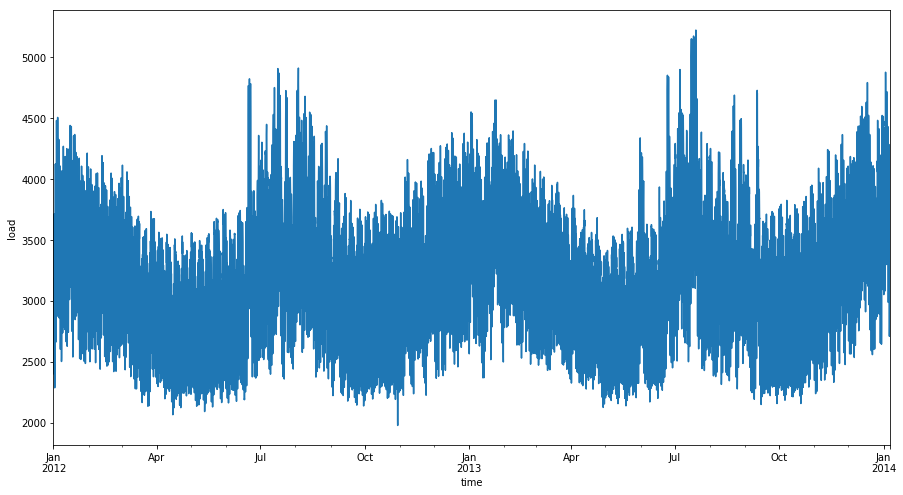

In [0]:
energy.load[:'2014-01-07 00:00:00'].plot(y='load', figsize = (15,8))
plt.xlabel('time')
plt.ylabel('load')
plt.show()

In [0]:
train_start_date = '2014-11-01 00:00:00'
test_start_date = '2014-12-30 00:00:00'
energy.index

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 01:00:00',
               '2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00',
               '2012-01-01 06:00:00', '2012-01-01 07:00:00',
               '2012-01-01 08:00:00', '2012-01-01 09:00:00',
               ...
               '2014-12-31 14:00:00', '2014-12-31 15:00:00',
               '2014-12-31 16:00:00', '2014-12-31 17:00:00',
               '2014-12-31 18:00:00', '2014-12-31 19:00:00',
               '2014-12-31 20:00:00', '2014-12-31 21:00:00',
               '2014-12-31 22:00:00', '2014-12-31 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=26304, freq=None)

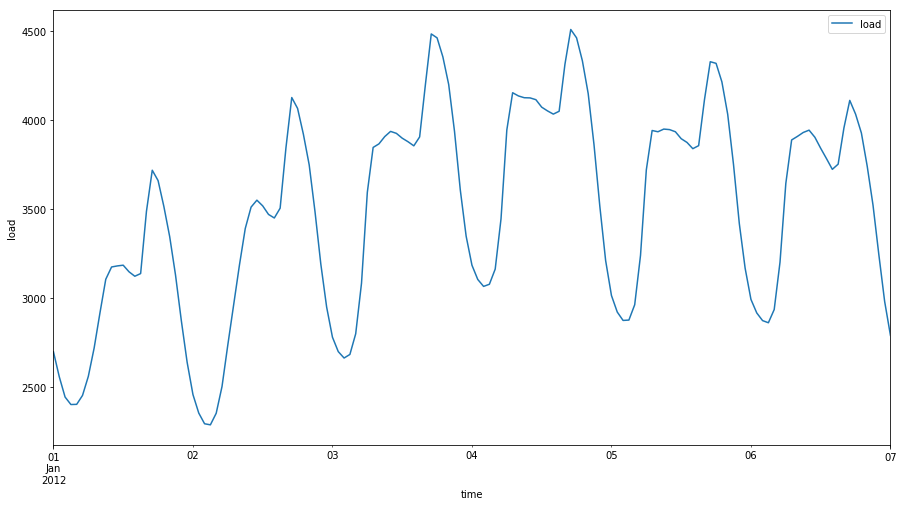

In [0]:
energy.loc[: '2012-01-07 00:00:00'].plot(y='load', figsize=(15,8))
plt.xlabel('time')
plt.ylabel('load')
plt.show()

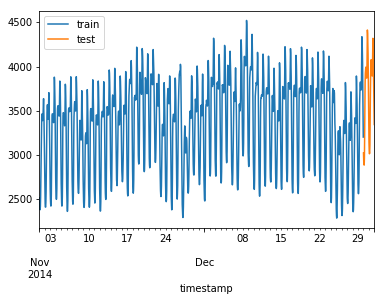

In [0]:
import numpy as np
energy[(energy.index < test_start_date) & (energy.index >= train_start_date)][['load']].rename(columns={'load':'train'}).join(energy[test_start_date:][['load']].rename(columns={'load':'test'}), how='outer').plot()

In [0]:
train = energy.copy()[(energy.index >= train_start_date) & (energy.index < test_start_date)][['load']]

In [0]:
train.head()

,load
timestamp,
2014-11-01 00:00:00,2514.0
2014-11-01 01:00:00,2434.0
2014-11-01 02:00:00,2390.0
2014-11-01 03:00:00,2382.0
2014-11-01 04:00:00,2419.0


In [0]:
test = energy.copy()[energy.index >= test_start_date][['load']]
test.head()

,load
timestamp,
2014-12-30 00:00:00,3023.0
2014-12-30 01:00:00,2935.0
2014-12-30 02:00:00,2899.0
2014-12-30 03:00:00,2886.0
2014-12-30 04:00:00,2963.0


In [0]:
# 딥러닝 넣기전에 민맥스스케일러로 0~1사이 값으로 바꿈
from sklearn.preprocessing import MinMaxScaler


In [0]:
scaler = MinMaxScaler()

In [0]:
train['load'] = scaler.fit_transform(train) # fit_transform은 학습을 하고 전체를보고 민맥스스케일링하는것. test엔 그대로 fit까지 해선 안됨. test까지학습할수잇기때문에
train.head() # test데이터에도 동일하게

,load
timestamp,
2014-11-01 00:00:00,0.101611
2014-11-01 01:00:00,0.065801
2014-11-01 02:00:00,0.046106
2014-11-01 03:00:00,0.042525
2014-11-01 04:00:00,0.059087


In [0]:
test['load'] = scaler.transform(test) # test데이터는 scaler.transform사용 fit은 안함
test.head()

,load
timestamp,
2014-12-30 00:00:00,0.329454
2014-12-30 01:00:00,0.290063
2014-12-30 02:00:00,0.273948
2014-12-30 03:00:00,0.268129
2014-12-30 04:00:00,0.302596


In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX #ai와 비교해볼 아리맥스

# 정해줘야하는것 얼마까지 예측할지 -> 예측할 미래의 갯수/타입스텝 HORIZON
HORIZON=3
model = SARIMAX(endog = train, order = (4, 1, 0), seasonal_order = (1, 1, 0, 24))
results = model.fit()

results.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                               load   No. Observations:                 1416
Model:             SARIMAX(4, 1, 0)x(1, 1, 0, 24)   Log Likelihood                3477.235
Date:                            Fri, 26 Jul 2019   AIC                          -6942.471
Time:                                    00:15:08   BIC                          -6911.044
Sample:                                11-01-2014   HQIC                         -6930.719
                                     - 12-29-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8406      0.016     52.278      0.000       0.809       0.872
ar.L2         -0.5214      0.034    -15.375      0.000      -0.588      -0.455
ar.L3          0.1533      0.044      3.461      0.001       0.066       0.240
ar.L4         -0.0770      0.036     -2.136      0.033      -0.148      -0.006
ar.S.L24      -0.2322      0.024     -9.692      0.000      -0.279      -0.185
sigma2         0.0004   8.32e-06     47.341      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       90.67   Jarque-Bera (JB):              1466.65
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             0.14
Prob(H) (two-sided):                  0.07   Kurtosis:                         8.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
# y_train에서 맞춰야할 레이블이 하나가 아님=타임스텝별로 y값이 여러개 -> 다중레이블 but다중 분류아님 -> 다중회귀
test_shifted = test.copy()
# 타입스텝별로 y_train값 체울거임 시프트해서
test_temp = test.copy()

In [0]:
test_temp['load'] = test_shifted['load'].shift(-1)
test_temp

,load
timestamp,
2014-12-30 00:00:00,0.290063
2014-12-30 01:00:00,0.273948
2014-12-30 02:00:00,0.268129
2014-12-30 03:00:00,0.302596
2014-12-30 04:00:00,0.408236
2014-12-30 05:00:00,0.568935
2014-12-30 06:00:00,0.679946
2014-12-30 07:00:00,0.730976
2014-12-30 08:00:00,0.751119


In [0]:
for t in range(1,3):
  test_shifted['load'+str(t)] = test_shifted['load'].shift(-t)# load값 옆으로 ㅇ롬길거임 / 새로운 컬럼 만들어서 내용 넣을거임
  
test_shifted = test_shifted.dropna(how='any') # 결측치 제거
test_shifted.head(5)

,load,load1,load2
timestamp,,,
2014-12-30 00:00:00,0.329454,0.290063,0.273948
2014-12-30 01:00:00,0.290063,0.273948,0.268129
2014-12-30 02:00:00,0.273948,0.268129,0.302596
2014-12-30 03:00:00,0.268129,0.302596,0.408236
2014-12-30 04:00:00,0.302596,0.408236,0.568935


In [0]:
# 아리마모델에 넣는게 어려움/과거 몇시간까지 볼껀지 정해줘야함
training_window = 720 # 한달치 볼겅니까 시간단위므로 720

train_ts = train['load']
test_ts = test_shifted


In [0]:
test_ts.shape

(46, 3)

In [0]:
history = [x for x in train_ts] # load만 모아놓은 리스트/데이터 프레임형태 x 리스트 형태로 넘겨줘야함 아리마모델은
history = history[(-training_window):]

predictions = []

for t in range(test_ts.shape[0]):
  model = SARIMAX(endog = history, order = (4, 1, 0), seasonal_order = (1, 1, 0, 24))
  model_a = model.fit()
  yhat = model_a.forecast(steps = 3) # 컬럼3개니까
  predictions.append(yhat)
  obs = list(test_ts.iloc[t])
  
  history.append(obs[0])
  print(test_ts.index[t])
  print(t+1,"예측값음 = ", yhat, '실제값은 = ', obs)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2014-12-30 00:00:00
1 예측값음 =  [0.32346117 0.28766443 0.27717717] 실제값은 =  [0.32945389435989236, 0.2900626678603402, 0.2739480752014323]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2014-12-30 01:00:00
2 예측값음 =  [0.29888632 0.28932341 0.30009176] 실제값은 =  [0.2900626678603402, 0.2739480752014323, 0.26812891674127126]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2014-12-30 02:00:00
3 예측값음 =  [0.27237752 0.28121034 0.32164713] 실제값은 =  [0.2739480752014323, 0.26812891674127126, 0.3025962399283795]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2014-12-30 03:00:00
4 예측값음 =  [0.28415118 0.32473559 0.41895566] 실제값은 =  [0.26812891674127126, 0.3025962399283795, 0.40823634735899716]
2014-12-30 04:00:00
5 예측값음 =  [0.29411943 0.38478038 0.53531533] 실제값은 =  [0.3025962399283795, 0.40823634735899716, 0.5689346463742166]
2014-12-30 05:00:00
6 예측값음 =  [0.40082513 0.55264374 0.66116429] 실제값은 =  [0.40823634735899716, 0.5689346463742166, 0.6799462846911368]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2014-12-30 06:00:00
7 예측값음 =  [0.56796082 0.67819317 0.74774942] 실제값은 =  [0.5689346463742166, 0.6799462846911368, 0.7309758281110115]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2014-12-30 07:00:00
8 예측값음 =  [0.6802453  0.75034961 0.80071121] 실제값은 =  [0.6799462846911368, 0.7309758281110115, 0.7511190689346463]
2014-12-30 08:00:00
9 예측값음 =  [0.74976115 0.80003131 0.82057121] 실제값은 =  [0.7309758281110115, 0.7511190689346463, 0.7636526410026856]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2014-12-30 09:00:00
10 예측값음 =  [0.76439901 0.78127745 0.7828411 ] 실제값은 =  [0.7511190689346463, 0.7636526410026856, 0.7381378692927483]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2014-12-30 10:00:00
11 예측값음 =  [0.75605486 0.755      0.73881281] 실제값은 =  [0.7636526410026856, 0.7381378692927483, 0.7188898836168307]
2014-12-30 11:00:00
12 예측값음 =  [0.76929331 0.7538309  0.74477829] 실제값은 =  [0.7381378692927483, 0.7188898836168307, 0.7090420769919425]
2014-12-30 12:00:00
13 예측값음 =  [0.69468395 0.67973051 0.6865447 ] 실제값은 =  [0.7188898836168307, 0.7090420769919425, 0.7081468218442255]
2014-12-30 13:00:00
14 예측값음 =  [0.72564445 0.73715373 0.76156185] 실제값은 =  [0.7090420769919425, 0.7081468218442255, 0.7385854968666068]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2014-12-30 14:00:00
15 예측값음 =  [0.70583703 0.72709156 0.8550204 ] 실제값은 =  [0.7081468218442255, 0.7385854968666068, 0.8478066248880931]
2014-12-30 15:00:00
16 예측값음 =  [0.73166999 0.86019877 0.97199136] 실제값은 =  [0.7385854968666068, 0.8478066248880931, 0.9516562220232765]
2014-12-30 16:00:00
17 예측값음 =  [0.87323159 0.986711   0.96836095] 실제값은 =  [0.8478066248880931, 0.9516562220232765, 0.934198746642793]
2014-12-30 17:00:00
18 예측값음 =  [0.93850812 0.91514234 0.86258878] 실제값은 =  [0.9516562220232765, 0.934198746642793, 0.8876454789615038]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2014-12-30 18:00:00
19 예측값음 =  [0.93979074 0.88959613 0.82441815] 실제값은 =  [0.934198746642793, 0.8876454789615038, 0.8294538943598924]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2014-12-30 19:00:00
20 예측값음 =  [0.87899213 0.81282041 0.70151531] 실제값은 =  [0.8876454789615038, 0.8294538943598924, 0.7197851387645477]
2014-12-30 20:00:00
21 예측값음 =  [0.82930676 0.71979187 0.58064467] 실제값은 =  [0.8294538943598924, 0.7197851387645477, 0.5747538048343777]
2014-12-30 21:00:00
22 예측값음 =  [0.72000797 0.58068606 0.46921725] 실제값은 =  [0.7197851387645477, 0.5747538048343777, 0.4592658907788718]
2014-12-30 22:00:00
23 예측값음 =  [0.58032854 0.46882353 0.38758387] 실제값은 =  [0.5747538048343777, 0.4592658907788718, 0.3858549686660697]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2014-12-30 23:00:00
24 예측값음 =  [0.45838154 0.376245   0.33797892] 실제값은 =  [0.4592658907788718, 0.3858549686660697, 0.34377797672336596]
2014-12-31 00:00:00
25 예측값음 =  [0.37791605 0.33989055 0.32544087] 실제값은 =  [0.3858549686660697, 0.34377797672336596, 0.32542524619516544]
2014-12-31 01:00:00
26 예측값음 =  [0.35488685 0.34196423 0.33954286] 실제값은 =  [0.34377797672336596, 0.32542524619516544, 0.33034914950760963]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2014-12-31 02:00:00
27 예측값음 =  [0.32099868 0.31641483 0.35426122] 실제값은 =  [0.32542524619516544, 0.33034914950760963, 0.3706356311548791]
2014-12-31 03:00:00
28 예측값음 =  [0.3246879  0.36329991 0.47001695] 실제값은 =  [0.33034914950760963, 0.3706356311548791, 0.470008952551477]
2014-12-31 04:00:00
29 예측값음 =  [0.37401465 0.48174053 0.64382714] 실제값은 =  [0.3706356311548791, 0.470008952551477, 0.6145926589077886]
2014-12-31 05:00:00
30 예측값음 =  [0.47538942 0.63692734 0.74706387] 실제값은 =  [0.470008952551477, 0.6145926589077886, 0.7247090420769919]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2014-12-31 06:00:00
31 예측값음 =  [0.62690129 0.73606135 0.78936603] 실제값은 =  [0.6145926589077886, 0.7247090420769919, 0.786034019695613]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2014-12-31 07:00:00
32 예측값음 =  [0.71290608 0.76396298 0.79132882] 실제값은 =  [0.7247090420769919, 0.786034019695613, 0.8012533572068039]
2014-12-31 08:00:00
33 예측값음 =  [0.78606923 0.81567504 0.82994727] 실제값은 =  [0.786034019695613, 0.8012533572068039, 0.7994628469113696]
2014-12-31 09:00:00
34 예측값음 =  [0.81546871 0.82949562 0.80837267] 실제값은 =  [0.8012533572068039, 0.7994628469113696, 0.780214861235452]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2014-12-31 10:00:00
35 예측값음 =  [0.80289524 0.77941723 0.76005566] 실제값은 =  [0.7994628469113696, 0.780214861235452, 0.7587287376902416]
2014-12-31 11:00:00
36 예측값음 =  [0.77262174 0.75267673 0.74483136] 실제값은 =  [0.780214861235452, 0.7587287376902416, 0.7367949865711727]
2014-12-31 12:00:00
37 예측값음 =  [0.76693063 0.76058569 0.76102099] 실제값은 =  [0.7587287376902416, 0.7367949865711727, 0.7188898836168307]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2014-12-31 13:00:00
38 예측값음 =  [0.74496307 0.74385209 0.77396255] 실제값은 =  [0.7367949865711727, 0.7188898836168307, 0.7273948075201431]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2014-12-31 14:00:00
39 예측값음 =  [0.72841404 0.7569458  0.87197444] 실제값은 =  [0.7188898836168307, 0.7273948075201431, 0.8299015219337511]
2014-12-31 15:00:00
40 예측값음 =  [0.73893711 0.85233784 0.96305622] 실제값은 =  [0.7273948075201431, 0.8299015219337511, 0.909579230080573]
2014-12-31 16:00:00
41 예측값음 =  [0.82991656 0.93783377 0.92574773] 실제값은 =  [0.8299015219337511, 0.909579230080573, 0.855863921217547]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2014-12-31 17:00:00
42 예측값음 =  [0.93797889 0.92621033 0.88182691] 실제값은 =  [0.909579230080573, 0.855863921217547, 0.7721575649059982]
2014-12-31 18:00:00
43 예측값음 =  [0.87245895 0.82262486 0.76911384] 실제값은 =  [0.855863921217547, 0.7721575649059982, 0.7023276633840643]
2014-12-31 19:00:00
44 예측값음 =  [0.79083605 0.73349663 0.63065754] 실제값은 =  [0.7721575649059982, 0.7023276633840643, 0.6195165622202325]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2014-12-31 20:00:00
45 예측값음 =  [0.69840316 0.59254643 0.45719164] 실제값은 =  [0.7023276633840643, 0.6195165622202325, 0.5425246195165621]
2014-12-31 21:00:00
46 예측값음 =  [0.59987936 0.4652574  0.35548145] 실제값은 =  [0.6195165622202325, 0.5425246195165621, 0.4735899731423454]


In [0]:
eval_df = pd.DataFrame(predictions, columns=['t'+str(t) for t in range(1, 3+1)])
eval_df['timestamp'] = test.index[0:len(test.index)-3+1]
eval_df = pd.melt(eval_df, id_vars='timestamp', value_name='prediction', var_name='h')
eval_df['actual'] = np.array(np.transpose(test_ts)).ravel()
eval_df[['prediction', 'actual']] = scaler.inverse_transform(eval_df[['prediction', 'actual']])
eval_df.head()

,timestamp,h,prediction,actual
0,2014-12-30 00:00:00,t1,3009.612263,3023.0
1,2014-12-30 01:00:00,t1,2954.712031,2935.0
2,2014-12-30 02:00:00,t1,2895.491387,2899.0
3,2014-12-30 03:00:00,t1,2921.793733,2886.0
4,2014-12-30 04:00:00,t1,2944.062810,2963.0


In [0]:
# mape 민앱솔루트퍼센트에러
eval_df['MAPE'] = (eval_df['prediction'] - eval_df['actual']).abs() / eval_df['actual']
eval_df.groupby('h')['MAPE'].mean()


h
t1    0.005712
t2    0.012332
t3    0.016947
Name: MAPE, dtype: float64

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


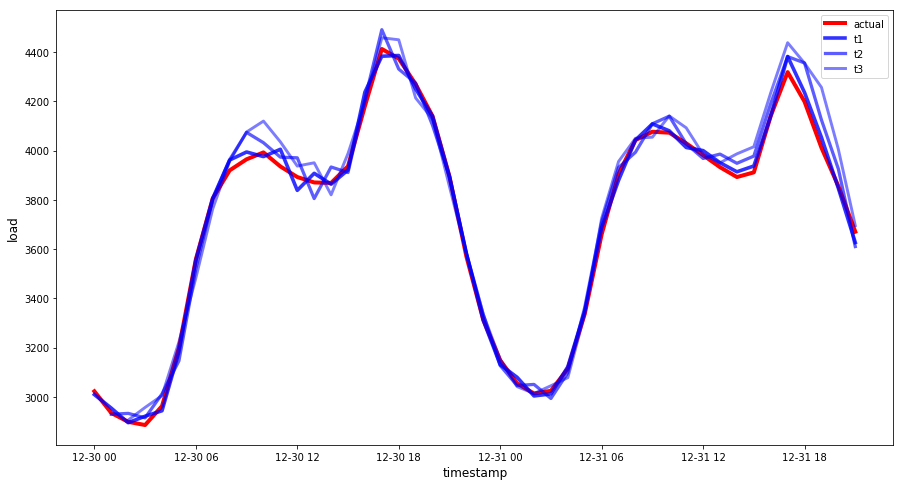

In [0]:
# 얘는 기계학습 개념이 아니라 다 정해준대로 계산해서 나옴, 값이 다 똑같
import math


if(HORIZON == 1):
    ## Plotting single step forecast
    eval_df.plot(x='timestamp', y=['actual', 'prediction'], style=['r', 'b'], figsize=(15, 8))

else:
    ## Plotting multi step forecast
    plot_df = eval_df[(eval_df.h=='t1')][['timestamp', 'actual']]
    for t in range(1, 4):
        plot_df['t'+str(t)] = eval_df[(eval_df.h=='t'+str(t))]['prediction'].values

    fig = plt.figure(figsize=(15, 8))
    ax = plt.plot(plot_df['timestamp'], plot_df['actual'], color='red', linewidth=4.0)
    ax = fig.add_subplot(111)
    for t in range(1, 4):
        x = plot_df['timestamp'][(t-1):]
        y = plot_df['t'+str(t)][0:len(x)]
        ax.plot(x, y, color='blue', linewidth=4*math.pow(.9,t), alpha=math.pow(0.8,t))
    
    ax.legend(loc='best')
    
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()
